In [1]:
import os
import prep
import prsa
import matplotlib.pyplot as plt

Ochotnik01
Normocapnia -> DC: 0.007411290322580311, AC: -0.00876179245282993
Hipercapnia -> DC: 0.029552139037432645, AC: -0.017564841498558803
-----------------------------------------
Ochotnik02
Normocapnia -> DC: 0.13745065789473687, AC: -0.09906250000000005
Hipercapnia -> DC: -0.0371075581395352, AC: -0.10970394736842065
-----------------------------------------
Ochotnik03
Normocapnia -> DC: 0.006493055555555544, AC: -0.006989644970414155
Hipercapnia -> DC: 0.01545258620689649, AC: -0.003625000000000017
-----------------------------------------
Ochotnik04
Normocapnia -> DC: 0.017844488188976576, AC: 0.08968992248062002
Hipercapnia -> DC: 0.04092763157894763, AC: -0.05247466216216254
-----------------------------------------
Ochotnik05
Normocapnia -> DC: 0.00018292682926820958, AC: 0.005659340659340789
Hipercapnia -> DC: 0.002488738738738422, AC: -0.001636029411764467
-----------------------------------------
Ochotnik06
Normocapnia -> DC: 0.0016982071713145253, AC: -0.00189873417721

c:\Users\Ignacy\PycharmProjects\Brainlab\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Ochotnik12
Normocapnia -> DC: 0.02027317880794674, AC: -0.019661144578312945
Hipercapnia -> DC: 0.005468749999999911, AC: -0.005454545454545462
-----------------------------------------
Ochotnik13
Normocapnia -> DC: -0.1049175824175822, AC: 0.08943807339449522
Hipercapnia -> DC: 0.040988924050632924, AC: -0.040273876404494424
-----------------------------------------
Ochotnik14
Normocapnia -> DC: 0.007540106951871434, AC: -0.0087621359223298
Hipercapnia -> DC: 0.03909659090909057, AC: -0.04913793103448216
-----------------------------------------
Ochotnik15
Normocapnia -> DC: -0.3059154929577457, AC: 0.14794776119402925
Hipercapnia -> DC: -0.06426562499999994, AC: 0.028220338983050708
-----------------------------------------


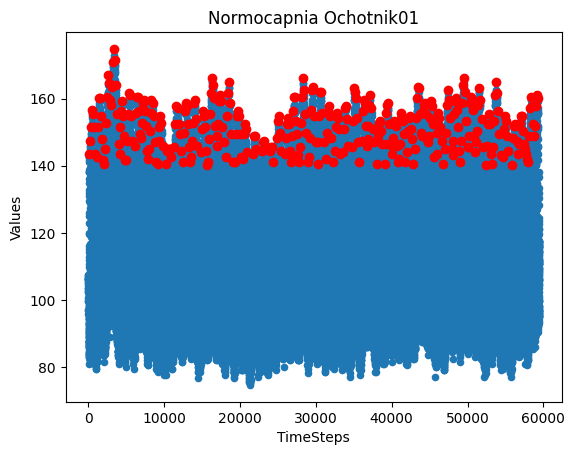

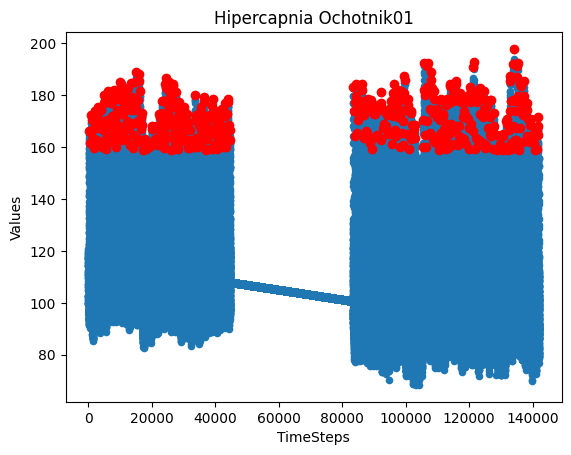

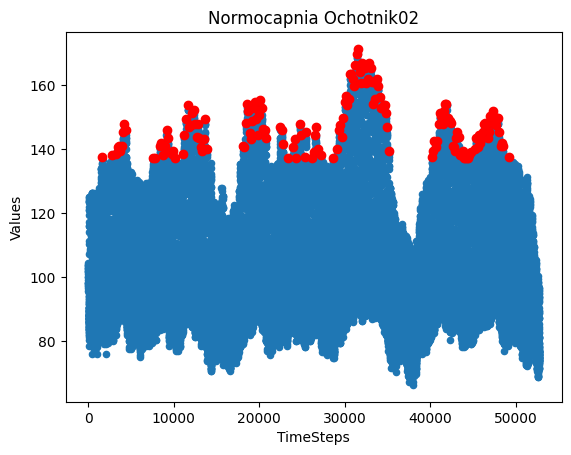

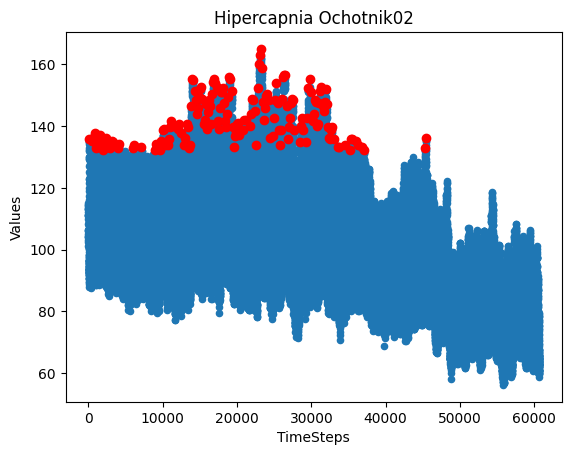

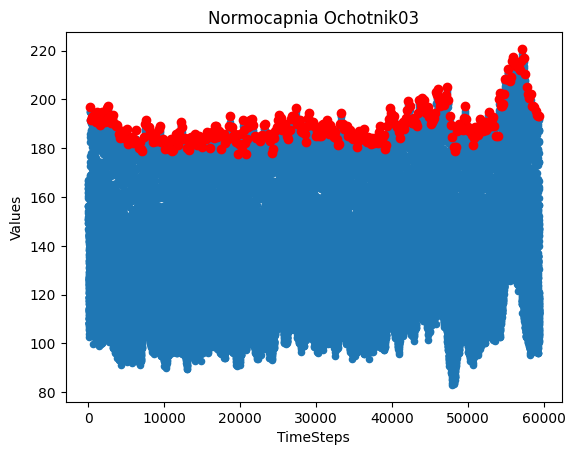

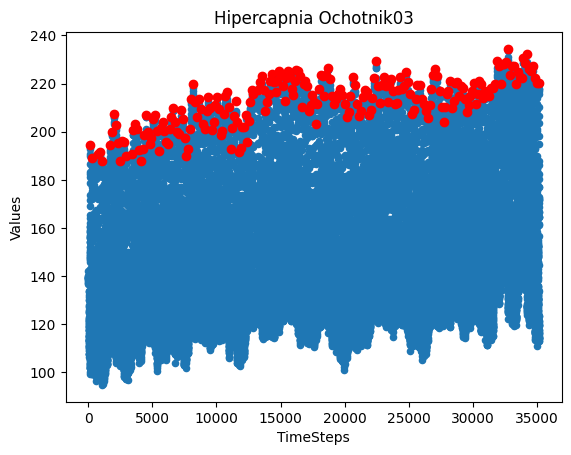

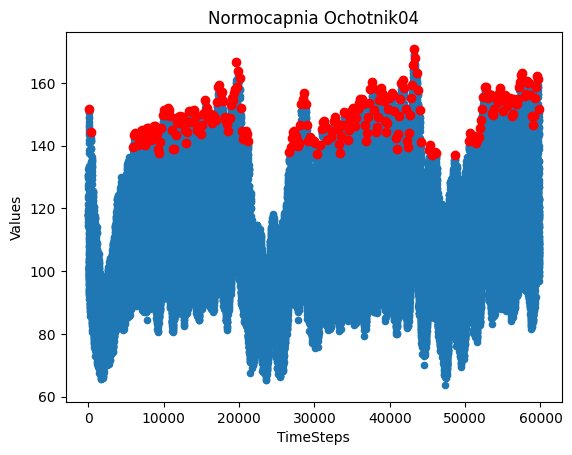

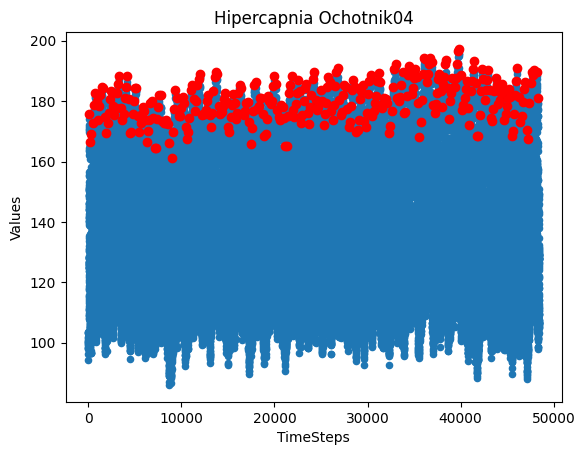

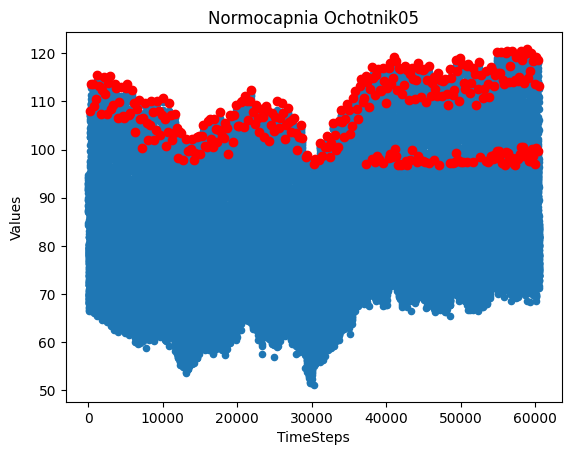

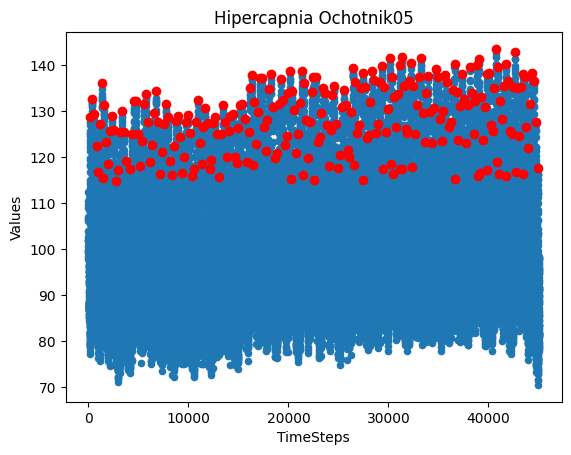

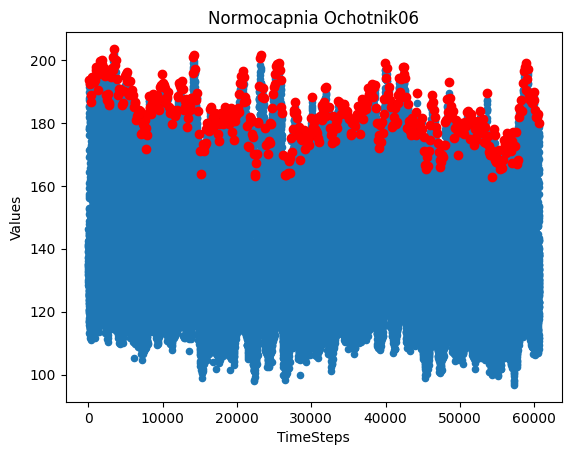

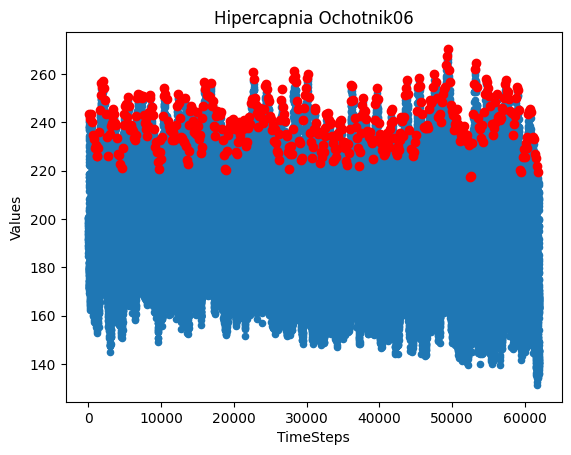

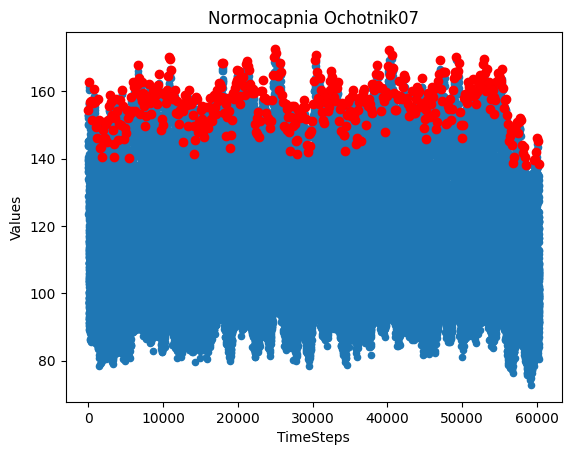

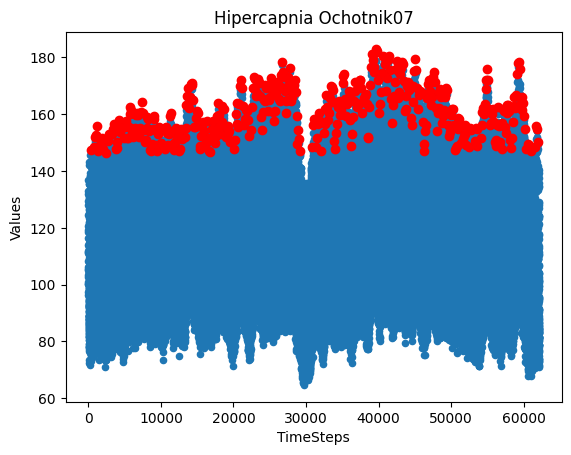

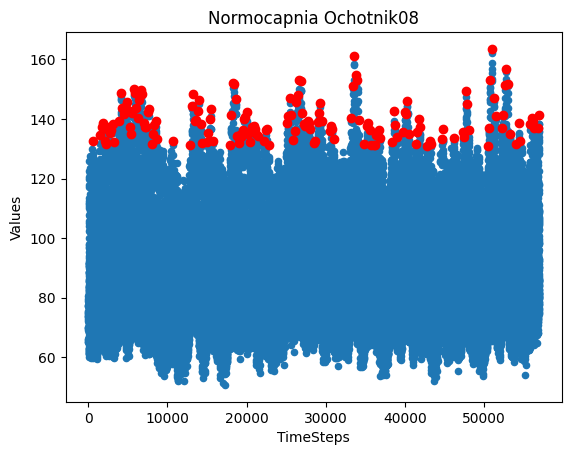

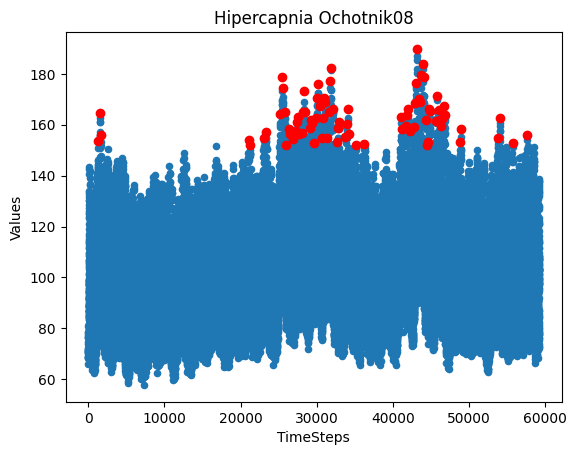

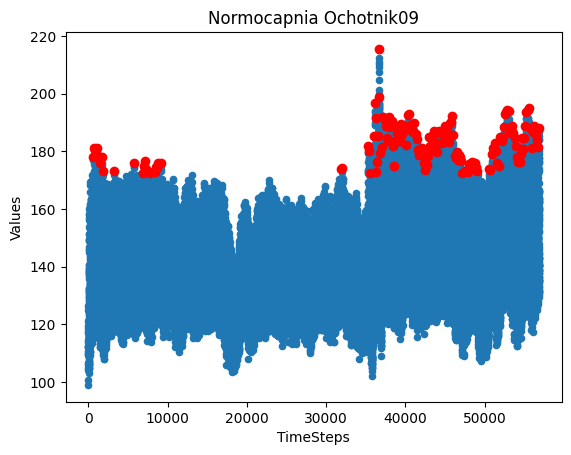

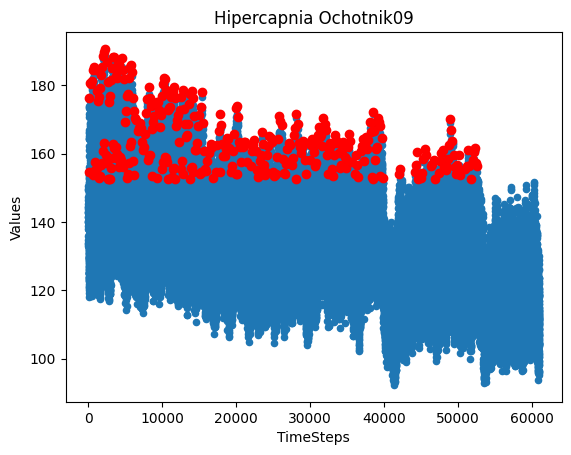

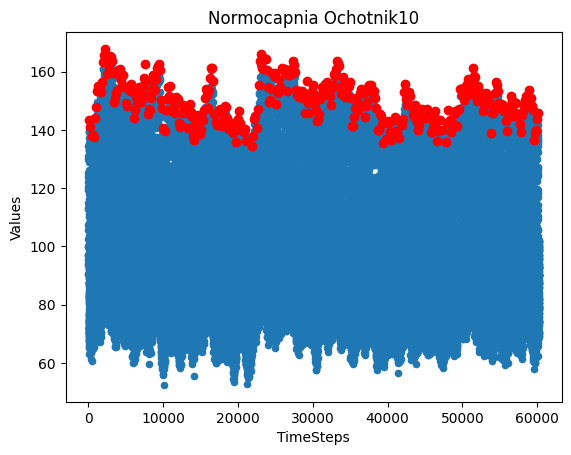

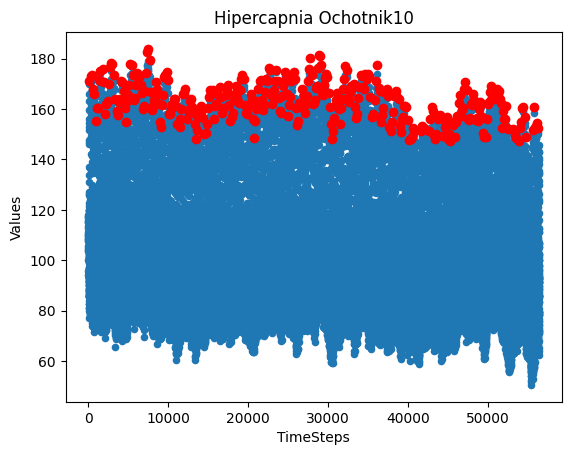

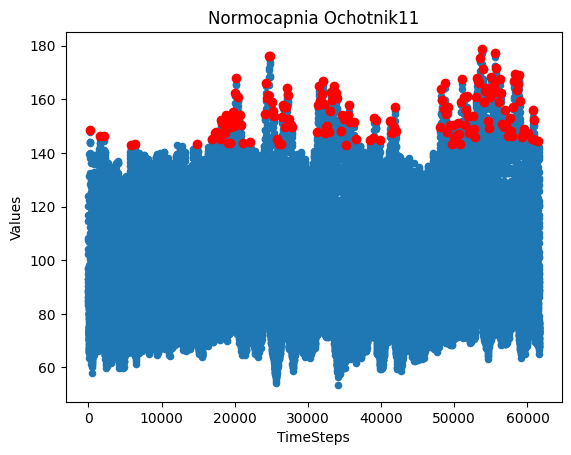

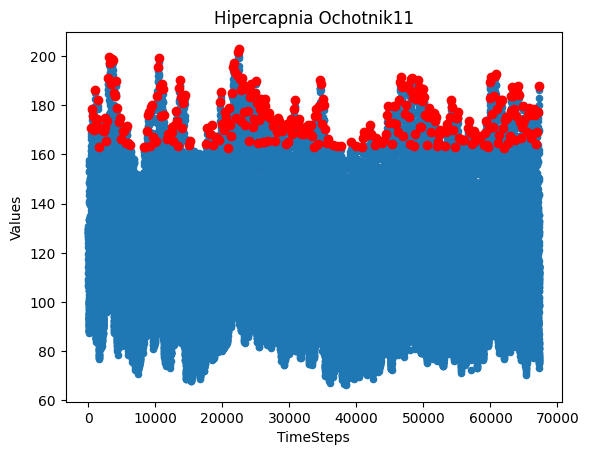

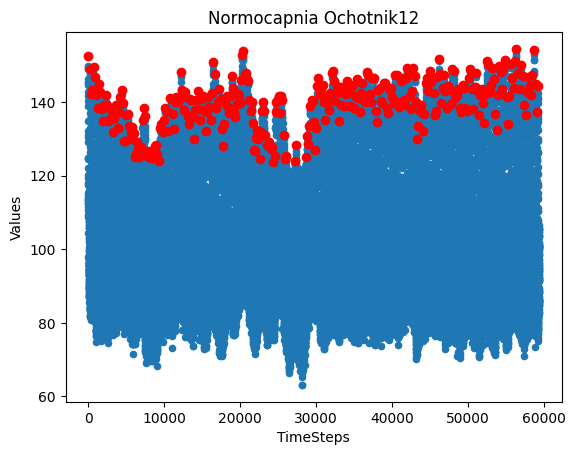

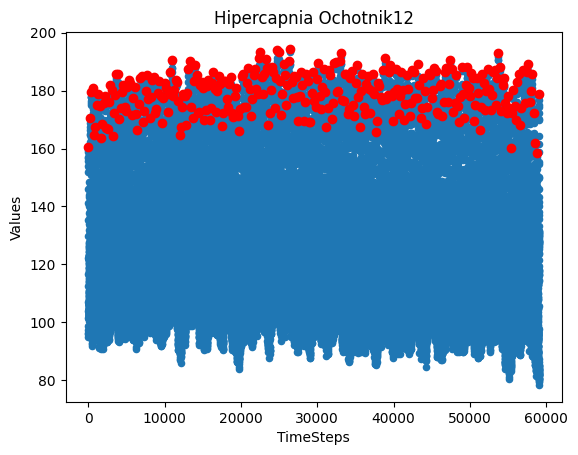

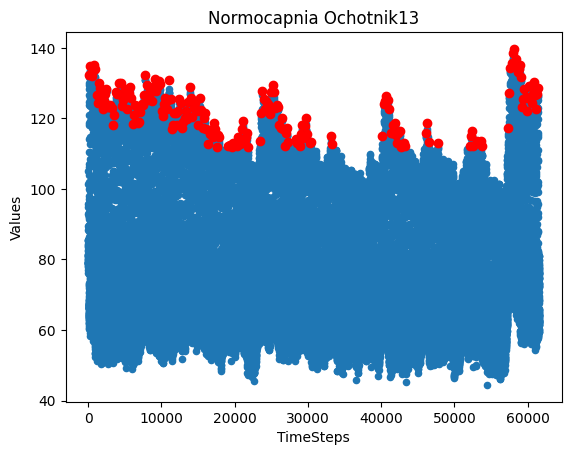

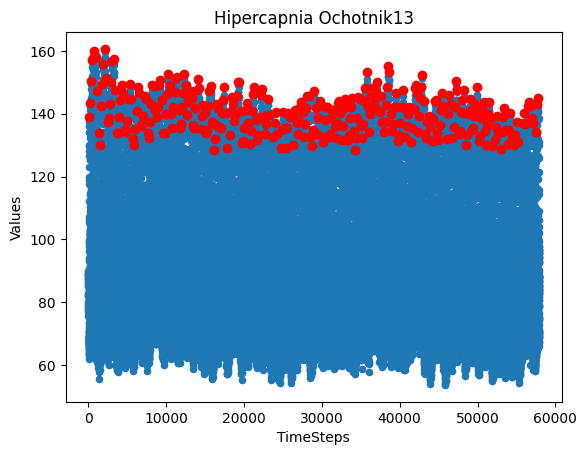

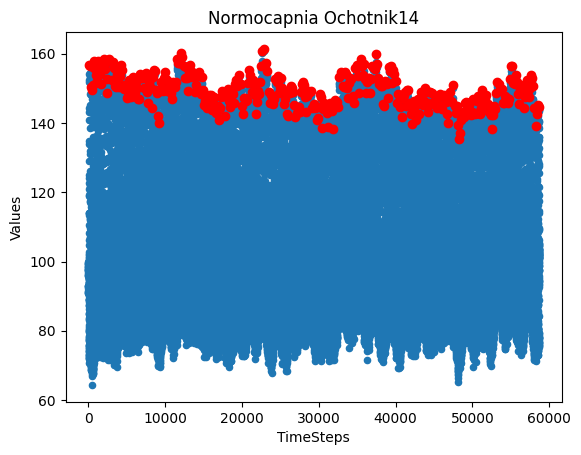

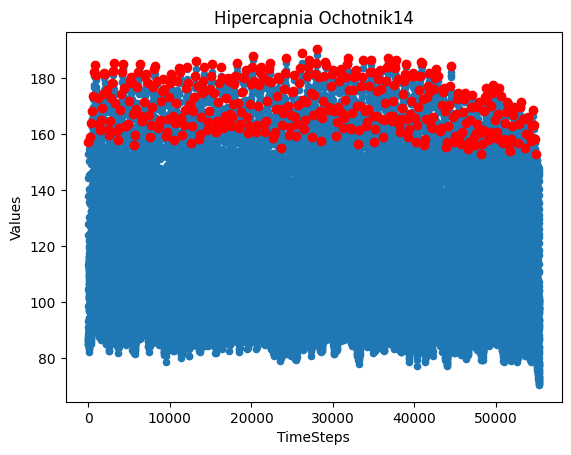

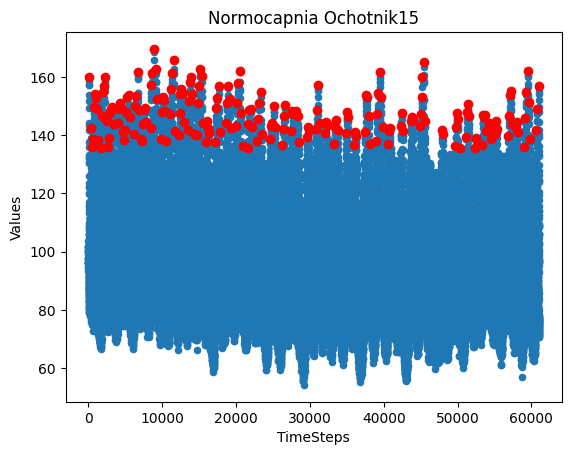

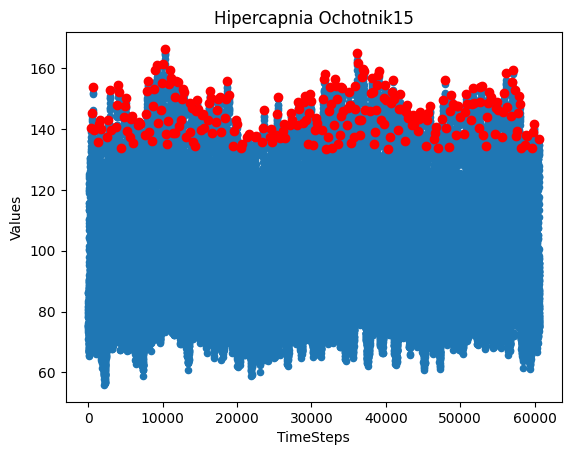

In [2]:
normo_data_path = 'data/normokapnia'
hiper_data_path = 'data/hiperkapnia'

results = {}
normo_dc_data = []
normo_ac_data = []
hiper_dc_data = []
hiper_ac_data = []
for normo_file, hiper_file in zip(os.listdir(normo_data_path), os.listdir(hiper_data_path)):
    if normo_file.endswith('.csv') and hiper_file.endswith('.csv'):
        normo_file_path = os.path.join(normo_data_path, normo_file)  
        hiper_file_path = os.path.join(hiper_data_path, hiper_file)

        normo_data = prep.read_data(normo_file_path, 'abp_finger[mm_Hg]')
        hiper_data = prep.read_data(hiper_file_path, 'abp_finger[mm_Hg]')

        file_nr = normo_file.split('_')[0]

        print(f'{file_nr}')
        normo_dc, normo_ac = prsa.calculate_rr_dc_ac(signal_df = normo_data, percentile = 0.8, distance = 50,show_plot= True, plot_title = f'Normocapnia {file_nr}')
        print(f'Normocapnia -> DC: {normo_dc}, AC: {normo_ac}')
        hiper_dc, hiper_ac = prsa.calculate_rr_dc_ac(signal_df = hiper_data, percentile = 0.8, distance = 50,show_plot= True, plot_title = f'Hipercapnia {file_nr}')
        print(f'Hipercapnia -> DC: {hiper_dc}, AC: {hiper_ac}')
        print('-----------------------------------------')
        normo_dc_data.append(normo_dc)
        normo_ac_data.append(normo_ac)
        hiper_dc_data.append(hiper_dc)
        hiper_ac_data.append(hiper_ac)
capacities = (normo_dc_data, normo_ac_data, hiper_dc_data, hiper_ac_data)

In [3]:
prsa.compare_capacities('abp_finger[mm_Hg]', capacities[0], capacities[1], capacities[2], capacities[3])

abp_finger[mm_Hg]
                      DC            AC
normocapnia  0.04 ± 0.16  -0.02 ± 0.10
hypercapnia  0.06 ± 0.20  -0.01 ± 0.07


In [6]:
# make prsa.compare_capacities but leave only 2nd, 6th, 7th, 10th 12th and 14th element from each list
new_capacities_0 = [capacities[0][1], capacities[0][5], capacities[0][6], capacities[0][9], capacities[0][11], capacities[0][13]]
new_capacities_1 = [capacities[1][1], capacities[1][5], capacities[1][6], capacities[1][9], capacities[1][11], capacities[1][13]]
new_capacities_2 = [capacities[2][1], capacities[2][5], capacities[2][6], capacities[2][9], capacities[2][11], capacities[2][13]]
new_capacities_3 = [capacities[3][1], capacities[3][5], capacities[3][6], capacities[3][9], capacities[3][11], capacities[3][13]]

prsa.compare_capacities('abp_finger[mm_Hg]', new_capacities_0, new_capacities_1, new_capacities_2, new_capacities_3)

abp_finger[mm_Hg]
                       DC            AC
normocapnia  -0.00 ± 0.20  -0.03 ± 0.03
hypercapnia   0.01 ± 0.03  -0.04 ± 0.04
